# Titanic Dataset Visualization
This notebook explores the Titanic dataset using basic visualizations and insights. The goal is to understand survival patterns based on various features.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


# Load the Titanic dataset

In [4]:
titanic_data = sns.load_dataset('titanic')

# Preview the first few rows
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# checking data types and non-null counts
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Data Cleaning 

In [18]:
# Checking if missing values
titanic_data.isnull().sum()
print(titanic_data.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

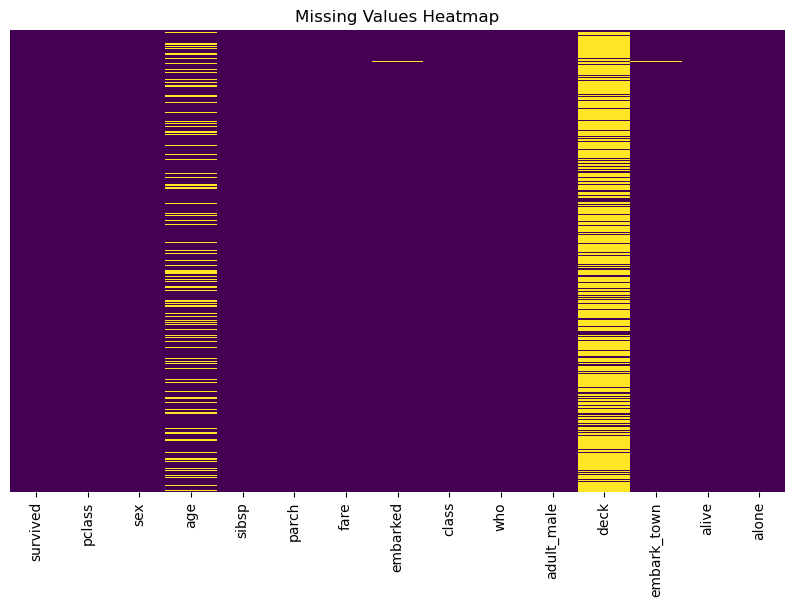

In [17]:
# Create the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [20]:
# Drop 'deck' column due to too many missing values
titanic_data.drop(columns=['deck'], inplace=True)

# Drop rows with missing 'embarked' or 'embark_town' (only 2)
titanic_data.dropna(subset=['embarked', 'embark_town'], inplace=True)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
titanic_data['sex_encoded'] = label_encoder.fit_transform(titanic_data['sex'])
titanic_data['embarked_encoded'] = label_encoder.fit_transform(titanic_data['embarked'])

# Define features to predict 'age'
features = ['pclass', 'sex_encoded', 'sibsp', 'parch', 'fare', 'embarked_encoded']

# Split data into known and missing age values
age_known = titanic_data[titanic_data['age'].notnull()]
age_missing = titanic_data[titanic_data['age'].isnull()]


In [24]:
# Train RandomForestRegressor on known ages
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(age_known[features], age_known['age'])

# Predict missing ages
predicted_ages = model.predict(age_missing[features])

In [27]:
# Fill the missing age values
titanic_data.loc[titanic_data['age'].isnull(), 'age'] = predicted_ages

# Drop helper encoded columns (optional)
titanic_data.drop(columns=['sex_encoded', 'embarked_encoded'], inplace=True)
print("Missing age values:", titanic_data['age'].isnull().sum())

Missing age values: 0


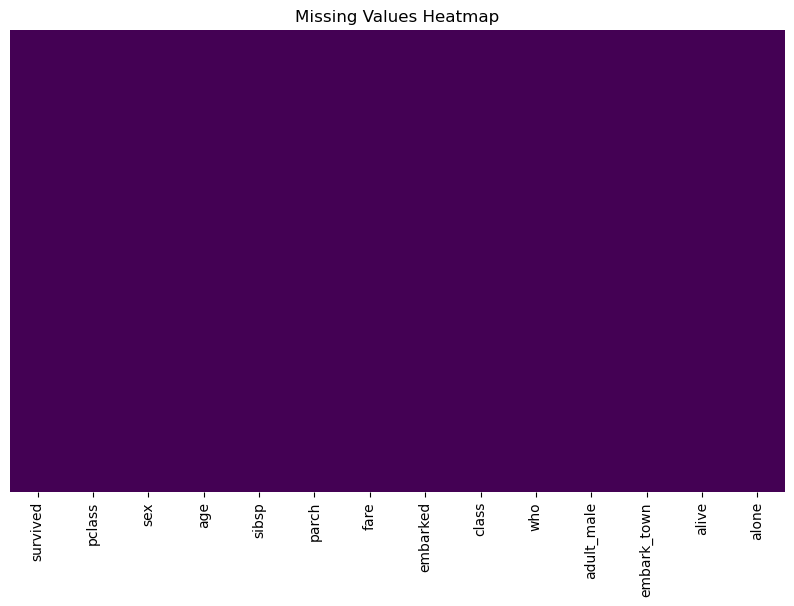

In [28]:
# Create the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Visualizing Survival Counts

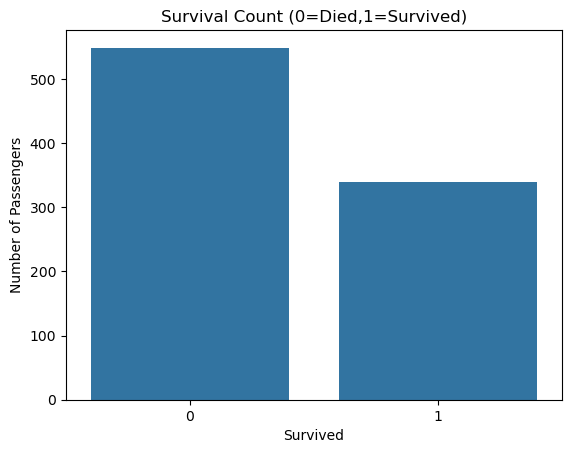

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='survived',data=titanic_data)
plt.title('Survival Count (0=Died,1=Survived)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

# Visualizing Survival by Gender

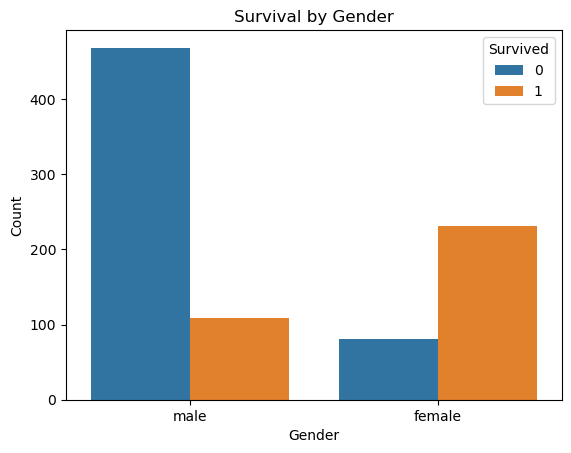

In [30]:
sns.countplot(x='sex',hue='survived',data=titanic_data)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Visualizing Survival by Passenger class

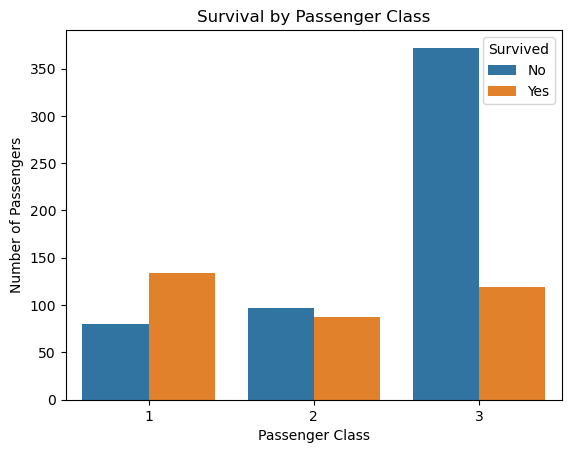

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pclass', hue='survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Visualizing Age Distribution

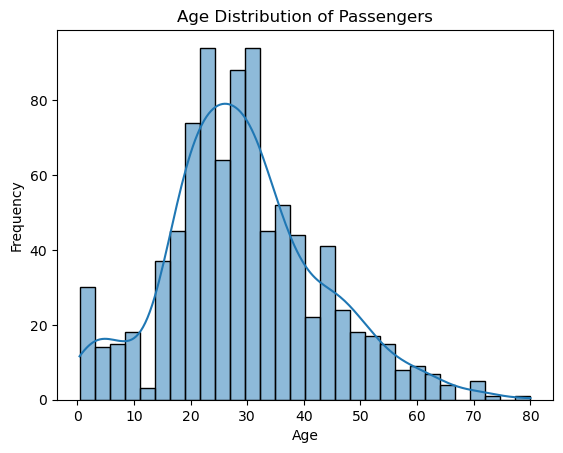

In [31]:
sns.histplot(titanic_data['age'].dropna(),bins=30,kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing Survival by Age Group

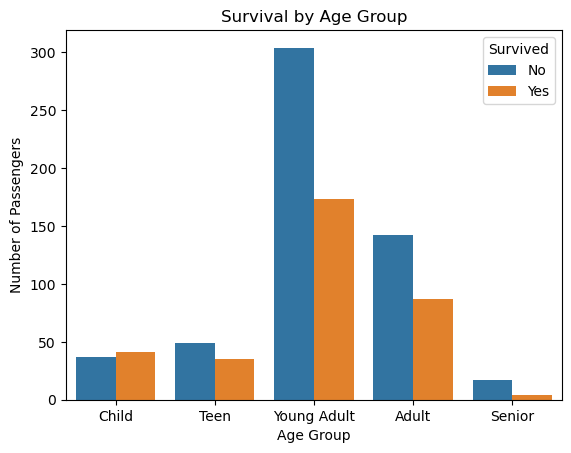

In [39]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

sns.countplot(x='age_group', hue='survived', data=titanic_data, order=labels)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Insights from Analysis¶

### Gender: Females had a higher survival rate compared to males.

### Class: Passengers in 1st class had better chances of survival.

### Age: Younger passengers (children) were more likely to survive.

# Boxplot of Age vs Class

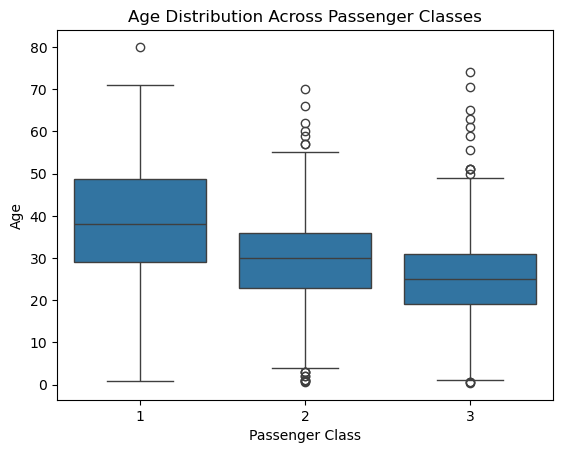

In [40]:
sns.boxplot(x='pclass', y='age', data=titanic_data)
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Heatmap of Feature Correlations

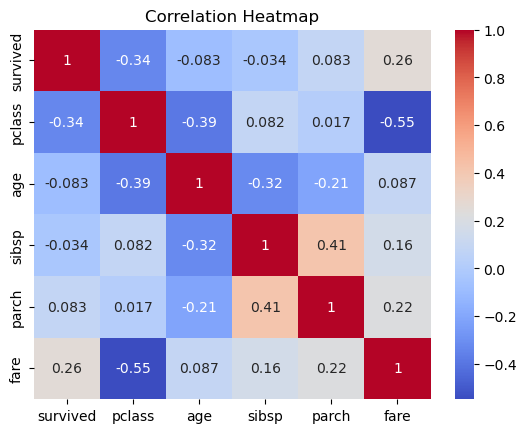

In [33]:
correlation = titanic_data[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering¶
Create meaningful features for better insights:<br>
Family Size: Combine sibsp and parch.<br>
Age Group: Categorize passengers into age brackets.

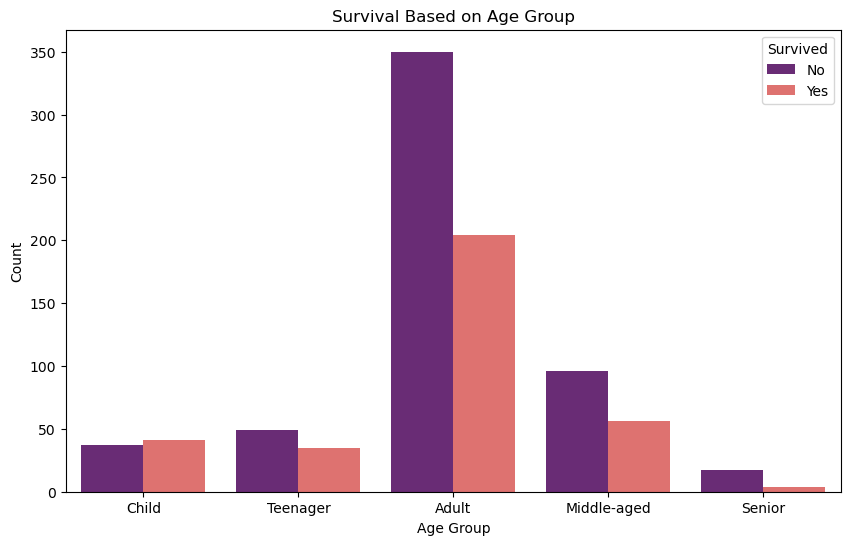

In [41]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Advanced Visualization (Heatmap)

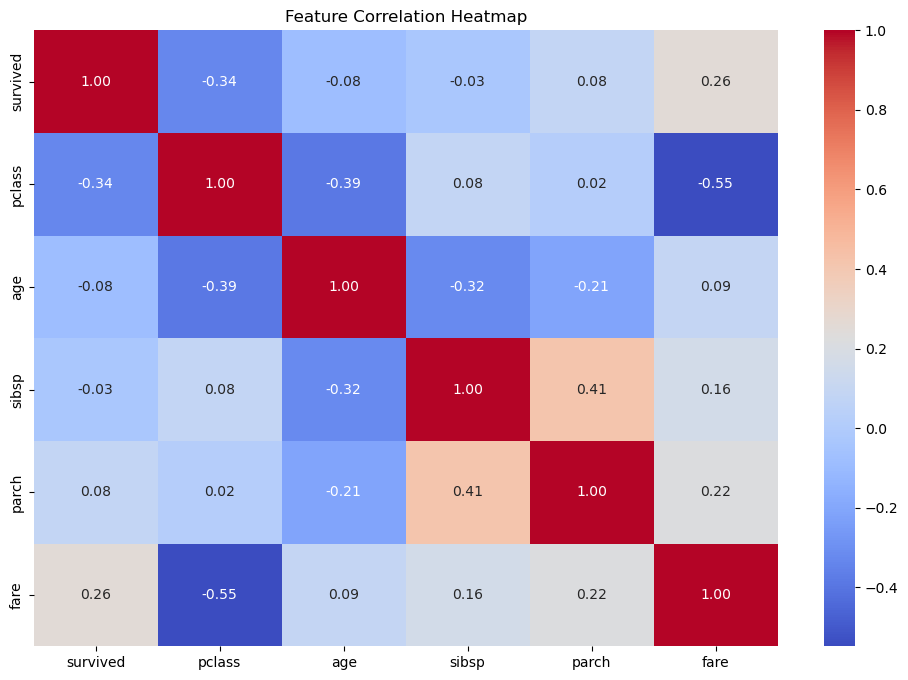

In [42]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation calculation
numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Conclusion and Analysis of Titanic Dataset EDA¶
After conducting a detailed exploratory data analysis (EDA) on the Titanic dataset, here are the key findings and insights:

# 1. Demographic Insights¶
### Gender:

- Females had a significantly higher survival rate compared to males. This aligns with the historical "women and children first" policy during the evacuation.
### Age Groups:

- Children (age ≤12) had the highest survival rate among all age groups.

- Adults (18–40 years) had a moderate survival rate, whereas older passengers (60+ years) had lower chances of survival.

# 2. Socioeconomic Insights

### Passenger Class (Pclass):
- Passengers in 1st class had much better survival chances compared to those in 2nd or 3rd class.
- The survival disparity likely resulted from better access to lifeboats and proximity to rescue points on the ship.

### Fare:
- Higher ticket fares were associated with increased survival rates.
- Wealthier passengers were more likely to be in 1st class, which offered better safety measures.
asures.
asures.
asures.
easures.


# 3. Family and Social Connections

### Family Size:
- Passengers with small family sizes (1–3 members) had higher survival rates.
- Large families (5+ members) had a lower likelihood of survival, possibly due to challenges in coordinating and accessing lifeboats.

### SibSp and Parch:
- Passengers traveling alone had lower survival rates compared to those with companions.


# 4. Correlation Analysis

- A strong positive correlation was observed between fare and survival, indicating that economic status played a significant role in survival.
- There was also a slight correlation between passenger class (pclass) and fare, emphasizing the advantages of being in the upper classes.


# Final Observations

### Survival Trends:
- Survival was heavily influenced by gender, age, socioeconomic status, and embarkation point.

### Disparities:
- Gender and class disparities were the most striking survival determinants, with females and 1st-class passengers significantly more likely to survive.

### Data Completeness:
- The dataset had some missing values (e.g., age), which were handled through imputation, ensuring a robust analysis.
